In [1]:
pip install jieba

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import jieba
import urllib.request
import matplotlib.pyplot as plt
import math

In [4]:
i=1
#url = 'https://raw.githubusercontent.com/cjwu/cjwu.github.io/master/courses/nlp/hw1-dataset.txt'
f = open("all_topic.txt",'r',encoding="utf-8")

In [5]:
def get_tokens(text):
    lowers = text.lower()
    #remove the punctuation using the character deletion step of translate
    remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)
    no_punctuation = lowers.translate(remove_punctuation_map)
    tokens = nltk.word_tokenize(no_punctuation)
    return tokens
def is_chinese(uchar):
    if uchar >= u'\u4e00' and uchar <= u'\u9fa5':
        return True
    else:
        return False

def format_str(content):
    content_str = ''
    for i in content:
        if is_chinese(i):
            content_str = content_str + ｉ
    return content_str
def draw1(word_no_show, tf_idfscore_show):
    plt.plot(word_no_show, tf_idfscore_show)
    plt.xlabel('Word No') # 設定x軸標題
    plt.ylabel('Weight')
    plt.title('tf-idf') # 設定圖表標題
    plt.show()
def draw2(word_no_show, tf_idfscore_show):
    plt.plot(word_no_show, tf_idfscore_show)
    plt.xlabel('Word No') # 設定x軸標題
    plt.ylabel('Freq')
    plt.title('Fre') # 設定圖表標題
    plt.show()
def tf(line_fre,line_word_num):
    return line_fre/line_word_num
def idf(m,fre):
    return math.log(m/fre)
def tf_idf(a,b):
    return a*b

In [6]:
m = 0 #行數
#txt = '電腦裡還是有著一堆開啟之後會亂碼內容完全看不懂的鬼畫符，是沒錯啦，一樣寫的是中文啦，但簡體與繁體兩種編碼方式就是無法共存，內容若是廣告直接刪了就好，但邊邊就是因為內容是想要的所以變成鬼畫符才更傷腦筋'
txt = ''

num_of_words_in_lines = [] #每一行的字詞數

fre_of_line = [] #每一行出現的字詞與對應的出現次數

for line in f:
    items = []
    convert = format_str(line)
    words  = jieba.cut(convert, cut_all=False)
    line_fre = {}
    line_word_num = 0
    for word in words:
        line_fre[word] = line_fre.get(word,0) + 1
        line_word_num = line_word_num + 1
    items = list(line_fre.items())  
    items.sort(key=lambda x:x[1], reverse=True)
    fre_of_line += (items, )
    num_of_words_in_lines += (line_word_num, )
    m = m+1
    
for i in range(10):
    print(fre_of_line[i])

print(m)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\s8797\AppData\Local\Temp\jieba.cache
Loading model cost 0.542 seconds.
Prefix dict has been built successfully.


[('這群', 2), ('人', 2), ('為', 1), ('什麼', 1), ('聖結', 1), ('石會', 1), ('被', 1), ('酸', 1), ('而', 1), ('不會質', 1), ('感劇本', 1), ('成員', 1), ('都', 1), ('差', 1), ('很多', 1), ('好', 1), ('嗎', 1), ('不要', 1), ('拿', 1), ('腎', 1), ('結石來', 1), ('污辱', 1)]
[('為', 1), ('什麼', 1), ('慶祝會', 1), ('被', 1), ('罵', 1), ('可是', 1), ('慶', 1), ('端午', 1), ('不會', 1), ('因為', 1), ('屈原', 1), ('不是', 1), ('台灣', 1), ('人', 1), ('是', 1), ('楚國人', 1)]
[('有', 2), ('阿瑞斯', 2), ('沒', 1), ('戰神', 1), ('的', 1), ('八卦', 1), ('爵士', 1), ('就是', 1), ('男主角', 1), ('最後死', 1), ('了', 1)]
[('脫節', 3), ('最', 2), ('的', 2), ('系', 2), ('不', 2), ('理論', 1), ('與', 1), ('實務', 1), ('哪個', 1), ('你問', 1), ('簡單', 1), ('多', 1), ('了', 1)]
[('看', 2), ('棒球', 2), ('為', 1), ('什麼', 1), ('這麼', 1), ('多', 1), ('人', 1), ('肥宅', 1), ('才', 1), ('系壘', 1), ('一堆', 1), ('胖子', 1)]
[('為', 1), ('什麼', 1), ('達摩祖', 1), ('師傳', 1), ('那麼', 1), ('好看', 1), ('達摩', 1), ('從頭', 1), ('到', 1), ('尾', 1), ('都', 1), ('是', 1), ('被', 1), ('動別', 1), ('人問', 1), ('他', 1), ('問題', 1)]
[('有人', 2), ('會畫', 2), (

計算tf

In [8]:
tfscore = 0
for i in range(m):
    for j in range(len(fre_of_line[i])):
        tf = fre_of_line[i][j][1] / num_of_words_in_lines[i]
        fre_of_line[i][j] += (tf, )

for i in range(10):
    print(fre_of_line[i])

[('這群', 2, 0.08333333333333333), ('人', 2, 0.08333333333333333), ('為', 1, 0.041666666666666664), ('什麼', 1, 0.041666666666666664), ('聖結', 1, 0.041666666666666664), ('石會', 1, 0.041666666666666664), ('被', 1, 0.041666666666666664), ('酸', 1, 0.041666666666666664), ('而', 1, 0.041666666666666664), ('不會質', 1, 0.041666666666666664), ('感劇本', 1, 0.041666666666666664), ('成員', 1, 0.041666666666666664), ('都', 1, 0.041666666666666664), ('差', 1, 0.041666666666666664), ('很多', 1, 0.041666666666666664), ('好', 1, 0.041666666666666664), ('嗎', 1, 0.041666666666666664), ('不要', 1, 0.041666666666666664), ('拿', 1, 0.041666666666666664), ('腎', 1, 0.041666666666666664), ('結石來', 1, 0.041666666666666664), ('污辱', 1, 0.041666666666666664)]
[('為', 1, 0.0625), ('什麼', 1, 0.0625), ('慶祝會', 1, 0.0625), ('被', 1, 0.0625), ('罵', 1, 0.0625), ('可是', 1, 0.0625), ('慶', 1, 0.0625), ('端午', 1, 0.0625), ('不會', 1, 0.0625), ('因為', 1, 0.0625), ('屈原', 1, 0.0625), ('不是', 1, 0.0625), ('台灣', 1, 0.0625), ('人', 1, 0.0625), ('是', 1, 0.0625), ('

count單詞出現幾行

In [9]:
word_num_of_line = {}
for j in range(m):
    for k in range(len(fre_of_line[j])):
        word_num_of_line[fre_of_line[j][k][0]] = word_num_of_line.get(fre_of_line[j][k][0],0) + 1

出現幾行存進list

In [10]:
for j in range(m):
    for k in range(len(fre_of_line[j])):
        fre_of_line[j][k] += (word_num_of_line[fre_of_line[j][k][0]], )

for i in range(10):
    print(fre_of_line[i])

[('這群', 2, 0.08333333333333333, 136), ('人', 2, 0.08333333333333333, 53126), ('為', 1, 0.041666666666666664, 29998), ('什麼', 1, 0.041666666666666664, 55725), ('聖結', 1, 0.041666666666666664, 72), ('石會', 1, 0.041666666666666664, 11), ('被', 1, 0.041666666666666664, 27688), ('酸', 1, 0.041666666666666664, 709), ('而', 1, 0.041666666666666664, 1442), ('不會質', 1, 0.041666666666666664, 2), ('感劇本', 1, 0.041666666666666664, 1), ('成員', 1, 0.041666666666666664, 156), ('都', 1, 0.041666666666666664, 59637), ('差', 1, 0.041666666666666664, 2403), ('很多', 1, 0.041666666666666664, 7311), ('好', 1, 0.041666666666666664, 39643), ('嗎', 1, 0.041666666666666664, 84924), ('不要', 1, 0.041666666666666664, 7890), ('拿', 1, 0.041666666666666664, 5245), ('腎', 1, 0.041666666666666664, 144), ('結石來', 1, 0.041666666666666664, 1), ('污辱', 1, 0.041666666666666664, 40)]
[('為', 1, 0.0625, 29998), ('什麼', 1, 0.0625, 55725), ('慶祝會', 1, 0.0625, 2), ('被', 1, 0.0625, 27688), ('罵', 1, 0.0625, 2078), ('可是', 1, 0.0625, 1348), ('慶', 1, 0.062

In [11]:
for i in range(m):
    for j in range(len(fre_of_line[i])):
        fre_of_line[i][j] += (idf(m,fre_of_line[i][j][3]), )
                   
for i in range(10):
    print(fre_of_line[i])

[('這群', 2, 0.08333333333333333, 136, 8.031064962629948), ('人', 2, 0.08333333333333333, 53126, 2.0632981187870305), ('為', 1, 0.041666666666666664, 29998, 2.6348338566106952), ('什麼', 1, 0.041666666666666664, 55725, 2.01553569011193), ('聖結', 1, 0.041666666666666664, 72, 8.667053729349945), ('石會', 1, 0.041666666666666664, 11, 10.545824575567629), ('被', 1, 0.041666666666666664, 27688, 2.7149654630508198), ('酸', 1, 0.041666666666666664, 709, 6.379864321833872), ('而', 1, 0.041666666666666664, 1442, 5.669933530521106), ('不會質', 1, 0.041666666666666664, 2, 12.250572667806054), ('感劇本', 1, 0.041666666666666664, 1, 12.943719848366), ('成員', 1, 0.041666666666666664, 156, 7.893863841116462), ('都', 1, 0.041666666666666664, 59637, 1.9476883825633688), ('差', 1, 0.041666666666666664, 2403, 5.159246612629531), ('很多', 1, 0.041666666666666664, 7311, 4.0465845060726835), ('好', 1, 0.041666666666666664, 39643, 2.356050181655576), ('嗎', 1, 0.041666666666666664, 84924, 1.594207830502215), ('不要', 1, 0.041666666666

存tf*idf = fre_of_line[i][j][2]*fre_of_line[i][j][4]

In [12]:
for i in range(m):
    for j in range(len(fre_of_line[i])):
        fre_of_line[i][j] += (fre_of_line[i][j][2]*fre_of_line[i][j][4], )

for i in range(10):
    print(fre_of_line[i])

[('這群', 2, 0.08333333333333333, 136, 8.031064962629948, 0.6692554135524956), ('人', 2, 0.08333333333333333, 53126, 2.0632981187870305, 0.1719415098989192), ('為', 1, 0.041666666666666664, 29998, 2.6348338566106952, 0.10978474402544564), ('什麼', 1, 0.041666666666666664, 55725, 2.01553569011193, 0.08398065375466375), ('聖結', 1, 0.041666666666666664, 72, 8.667053729349945, 0.36112723872291436), ('石會', 1, 0.041666666666666664, 11, 10.545824575567629, 0.43940935731531783), ('被', 1, 0.041666666666666664, 27688, 2.7149654630508198, 0.11312356096045081), ('酸', 1, 0.041666666666666664, 709, 6.379864321833872, 0.26582768007641133), ('而', 1, 0.041666666666666664, 1442, 5.669933530521106, 0.2362472304383794), ('不會質', 1, 0.041666666666666664, 2, 12.250572667806054, 0.5104405278252522), ('感劇本', 1, 0.041666666666666664, 1, 12.943719848366, 0.5393216603485833), ('成員', 1, 0.041666666666666664, 156, 7.893863841116462, 0.3289109933798526), ('都', 1, 0.041666666666666664, 59637, 1.9476883825633688, 0.081153682

In [13]:
tmp_all = []

for i in range(m):
    for j in range(len(fre_of_line[i])):
        tmp_all.append((fre_of_line[i][j]))

for i in range(10):
    print(tmp_all[i])
for i in range(1):
    for j in range(10):
        print(fre_of_line[i][j])

('這群', 2, 0.08333333333333333, 136, 8.031064962629948, 0.6692554135524956)
('人', 2, 0.08333333333333333, 53126, 2.0632981187870305, 0.1719415098989192)
('為', 1, 0.041666666666666664, 29998, 2.6348338566106952, 0.10978474402544564)
('什麼', 1, 0.041666666666666664, 55725, 2.01553569011193, 0.08398065375466375)
('聖結', 1, 0.041666666666666664, 72, 8.667053729349945, 0.36112723872291436)
('石會', 1, 0.041666666666666664, 11, 10.545824575567629, 0.43940935731531783)
('被', 1, 0.041666666666666664, 27688, 2.7149654630508198, 0.11312356096045081)
('酸', 1, 0.041666666666666664, 709, 6.379864321833872, 0.26582768007641133)
('而', 1, 0.041666666666666664, 1442, 5.669933530521106, 0.2362472304383794)
('不會質', 1, 0.041666666666666664, 2, 12.250572667806054, 0.5104405278252522)
('這群', 2, 0.08333333333333333, 136, 8.031064962629948, 0.6692554135524956)
('人', 2, 0.08333333333333333, 53126, 2.0632981187870305, 0.1719415098989192)
('為', 1, 0.041666666666666664, 29998, 2.6348338566106952, 0.10978474402544564)


In [14]:
tmp_all.sort(key=lambda x:x[5], reverse=True)
for i in range(100):
    print(tmp_all[i])

('咪姆宅', 1, 1.0, 1, 12.943719848366, 12.943719848366)
('以會友', 1, 1.0, 1, 12.943719848366, 12.943719848366)
('收悉', 1, 1.0, 1, 12.943719848366, 12.943719848366)
('從軍詩', 1, 1.0, 1, 12.943719848366, 12.943719848366)
('戊戌', 1, 1.0, 1, 12.943719848366, 12.943719848366)
('吉吉吉覆吉吉', 1, 1.0, 1, 12.943719848366, 12.943719848366)
('圖咧文', 1, 1.0, 1, 12.943719848366, 12.943719848366)
('喇喇喇喇喇喇喇', 1, 1.0, 1, 12.943719848366, 12.943719848366)
('偽鈔', 1, 1.0, 1, 12.943719848366, 12.943719848366)
('角速度', 1, 1.0, 1, 12.943719848366, 12.943719848366)
('推三小三小', 1, 1.0, 1, 12.943719848366, 12.943719848366)
('何念茲', 1, 1.0, 2, 12.250572667806054, 12.250572667806054)
('泰拉', 1, 1.0, 2, 12.250572667806054, 12.250572667806054)
('禮義廉', 1, 1.0, 2, 12.250572667806054, 12.250572667806054)
('柔珠', 1, 1.0, 3, 11.84510755969789, 11.84510755969789)
('尼尼', 1, 1.0, 4, 11.557425487246109, 11.557425487246109)
('編碼', 1, 1.0, 4, 11.557425487246109, 11.557425487246109)
('岡本', 1, 1.0, 5, 11.3342819359319, 11.3342819359319)
('團團', 1,

In [15]:
tfidf_top100 = []
num = 0
n = 0
while(num<=100):
    check = 0
    for j in range(num):
        if num!=0:
            if tmp_all[n][0] == tfidf_top100[j][0]:
                n = n+1
                check = 1
                break
    if check == 0:
        tfidf_top100.append(tmp_all[n])
        n = n+1
        num = num+1

for i in range(100):
    print(tfidf_top100[i])

('咪姆宅', 1, 1.0, 1, 12.943719848366, 12.943719848366)
('以會友', 1, 1.0, 1, 12.943719848366, 12.943719848366)
('收悉', 1, 1.0, 1, 12.943719848366, 12.943719848366)
('從軍詩', 1, 1.0, 1, 12.943719848366, 12.943719848366)
('戊戌', 1, 1.0, 1, 12.943719848366, 12.943719848366)
('吉吉吉覆吉吉', 1, 1.0, 1, 12.943719848366, 12.943719848366)
('圖咧文', 1, 1.0, 1, 12.943719848366, 12.943719848366)
('喇喇喇喇喇喇喇', 1, 1.0, 1, 12.943719848366, 12.943719848366)
('偽鈔', 1, 1.0, 1, 12.943719848366, 12.943719848366)
('角速度', 1, 1.0, 1, 12.943719848366, 12.943719848366)
('推三小三小', 1, 1.0, 1, 12.943719848366, 12.943719848366)
('何念茲', 1, 1.0, 2, 12.250572667806054, 12.250572667806054)
('泰拉', 1, 1.0, 2, 12.250572667806054, 12.250572667806054)
('禮義廉', 1, 1.0, 2, 12.250572667806054, 12.250572667806054)
('柔珠', 1, 1.0, 3, 11.84510755969789, 11.84510755969789)
('尼尼', 1, 1.0, 4, 11.557425487246109, 11.557425487246109)
('編碼', 1, 1.0, 4, 11.557425487246109, 11.557425487246109)
('岡本', 1, 1.0, 5, 11.3342819359319, 11.3342819359319)
('團團', 1,

頻率top100

In [16]:
tmp_all.sort(key=lambda x:(x[1]/x[4]), reverse=True)
for i in range(100):
    print(tmp_all[i])

('的', 7, 0.3888888888888889, 241426, 0.5494015614663519, 0.21365616279247018)
('的', 7, 0.3684210526315789, 241426, 0.5494015614663519, 0.20241110159286646)
('的', 7, 0.3181818181818182, 241426, 0.5494015614663519, 0.17480958773929378)
('的', 7, 0.2692307692307692, 241426, 0.5494015614663519, 0.14791580501017165)
('的', 6, 0.375, 241426, 0.5494015614663519, 0.20602558554988196)
('的', 6, 0.3157894736842105, 241426, 0.5494015614663519, 0.17349522993674268)
('的', 6, 0.2727272727272727, 241426, 0.5494015614663519, 0.14983678949082324)
('的', 6, 0.2727272727272727, 241426, 0.5494015614663519, 0.14983678949082324)
('的', 6, 0.23076923076923078, 241426, 0.5494015614663519, 0.1267849757230043)
('的', 6, 0.23076923076923078, 241426, 0.5494015614663519, 0.1267849757230043)
('的', 6, 0.2, 241426, 0.5494015614663519, 0.10988031229327039)
('有', 12, 0.5, 125340, 1.2049345245873333, 0.6024672622936666)
('的', 5, 0.3333333333333333, 241426, 0.5494015614663519, 0.18313385382211728)
('的', 5, 0.3125, 241426, 0.54

In [17]:
fretop100 = []
getnum = 0
n = 0
while(getnum<=100):
    check2 = 0
    for j in range(getnum):
        if getnum!=0:
            if tmp_all[n][0] == fretop100[j][0]:
                n = n+1
                check2 = 1
                break
    if check2 == 0:
        fretop100.append(tmp_all[n])
        n = n+1
        getnum = getnum+1

for i in range(100):
    print(fretop100[i])

('的', 7, 0.3888888888888889, 241426, 0.5494015614663519, 0.21365616279247018)
('有', 12, 0.5, 125340, 1.2049345245873333, 0.6024672622936666)
('啦', 27, 0.9, 10339, 3.7000414167793068, 3.3300372751013763)
('錢', 23, 0.8214285714285714, 14341, 3.3728420016367875, 2.7705487870587895)
('了', 12, 0.375, 70388, 1.7819417752943476, 0.6682281657353804)
('喔', 23, 0.7931034482758621, 8596, 3.884667590603599, 3.080943261513199)
('欸', 27, 0.75, 2605, 5.078531894178532, 3.808898920633899)
('吃', 16, 0.7272727272727273, 19246, 3.0786613224496535, 2.239026416327021)
('好', 12, 0.375, 39643, 2.356050181655576, 0.8835188181208411)
('都', 9, 0.3103448275862069, 59637, 1.9476883825633688, 0.6044550152782869)
('沒', 6, 0.25, 91397, 1.5207519142195485, 0.3801879785548871)
('咩', 25, 1.0, 540, 6.65215070880768, 6.65215070880768)
('喵', 24, 0.8571428571428571, 462, 6.808154957284261, 5.835561391957937)
('買', 13, 0.5909090909090909, 9959, 3.73748790443436, 2.208515579893031)
('在', 7, 0.3181818181818182, 55535, 2.01895

畫tf*idf圖

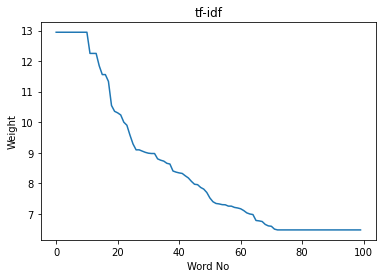

In [18]:
x_label = []
y_label = []

for i in range(100):
    x_label.append(i)
    y_label.append(tfidf_top100[i][5])

draw1(x_label, y_label)

畫tf圖

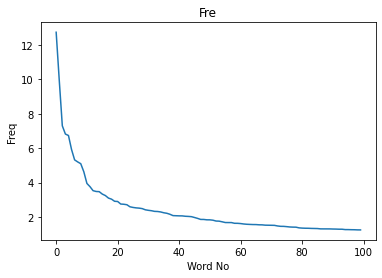

In [19]:
x_label = []
y_label = []

for i in range(100):
    x_label.append(i)
    y_label.append(fretop100[i][1]/fretop100[i][4])

draw2(x_label, y_label)